In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
%matplotlib inline

titanic_train = pd.read_csv("train.csv")
titanic_train.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_test = pd.read_csv('test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
titanic_train.shape

(891, 12)

In [ ]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_test.shape

(418, 11)

Pclass 선실등급별 생존여부

In [ ]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
print(titanic_train.groupby(['Pclass','Sex','Survived'])['Survived'].count())

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64


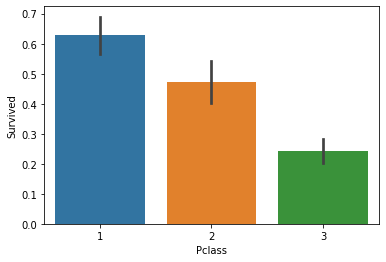

In [ ]:
sns.barplot(x='Pclass',y='Survived',data=titanic_train) #선실등급이 1등급일수록 생존률이 높음 (1->2->3)
plt.show()

In [ ]:
titanic_train.groupby(['Sex','Survived'])['Survived'].count() 

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

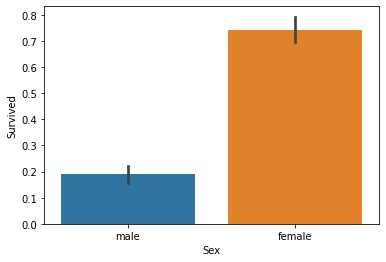

In [ ]:
sns.barplot(x='Sex',y='Survived',data=titanic_train) #여자가 남자보다 생존률이 높음
plt.show()

<function matplotlib.pyplot.show>

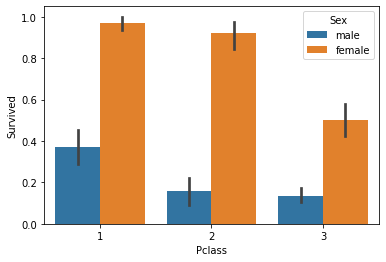

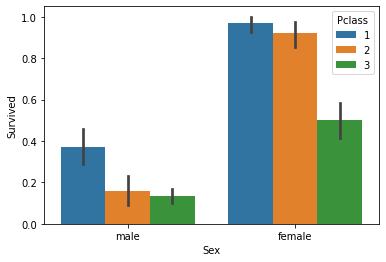

In [ ]:
# 성별 별 Pclass 별 생존여부
pl.figure(1)
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_train)
pl.figure(2)
sns.barplot(x='Sex',y='Survived',hue='Pclass',data=titanic_train)
pl.show

Name 별 생존여부

In [ ]:
combine = [titanic_train,titanic_test]
for titanic_set in combine:
  titanic_set['Title'] = titanic_set['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [ ]:
titanic_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Lady          1
Ms            1
Jonkheer      1
Mme           1
Don           1
Sir           1
Countess      1
Capt          1
Name: Title, dtype: int64

In [ ]:
titanic_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [ ]:
Titanic_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Major":3,"Mile":3,"Col":3,"Mme":3,"Capt":3,"Don":3,"Countess":3,"Sir":3,"Lady":3,"Jonkheer":3,"Ms":3,'Done':3}
for titanic_set in combine:
  titanic_set['Title_num'] = titanic_set['Title'].map(Titanic_mapping)

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0.0


In [ ]:
titanic_train.drop('Title', axis=1, inplace=True)
titanic_test.drop('Title', axis=1, inplace=True)

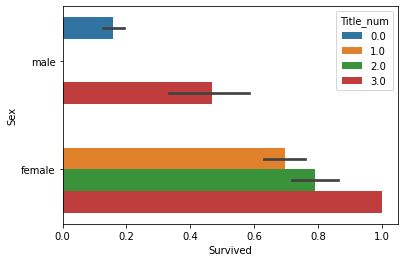

In [ ]:
sns.barplot(x="Survived",y='Sex',hue='Title_num',data=titanic_train) #이름을 통하여 상대적으로 남자가 생존률이 낮고 3의 경우 분포가 적기때문에 생존률이 크게 나온걸 알수있다.
plt.show()

In [ ]:
titanic_train['Title_num'].isnull().sum()

2

In [ ]:
titanic_train['Title_num'].fillna(1.0,inplace=True)
print(titanic_train['Title_num'].isnull().sum())

0


In [ ]:
#sex_mapping = {"male" : 0 , "female" : 1}
#for dataset in combine:
    #dataset['Sex']= dataset['Sex'].map(sex_mapping)

Age,Cabin,Embarked null값 처리

In [ ]:
print(titanic_train.isnull().sum())
print(titanic_train.isnull().sum().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title_num        0
dtype: int64
866


In [ ]:
print(titanic_test.isnull().sum())
print(titanic_test.isnull().sum().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title_num        1
dtype: int64
415


In [ ]:
titanic_train['Age'].fillna(titanic_train.groupby('Title_num')['Age'].transform('median'),inplace=True)#각 타이틀 별 나이의 평균(중간값)으로 결측치 처리
titanic_train['Cabin'].fillna('N',inplace=True)
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0],inplace=True)

titanic_test['Age'].fillna(titanic_test.groupby('Title_num')['Age'].transform('median'),inplace=True)#각 타이틀 별 나이의 평균(중간값)으로 결측치 처리
titanic_test['Cabin'].fillna('N',inplace=True)
titanic_test['Title_num'].fillna(3,inplace=True)
titanic_test['Fare'].fillna(titanic_test['Fare'].mode()[0],inplace=True)

In [ ]:
print(titanic_train.isnull().sum())
print(titanic_train.isnull().sum().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title_num      0
dtype: int64
0


In [ ]:
print(titanic_test.isnull().sum())
print(titanic_test.isnull().sum().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title_num      0
dtype: int64
0


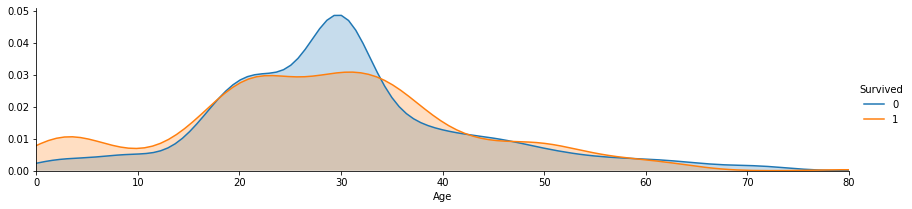

In [ ]:
facet = sns.FacetGrid(titanic_train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,titanic_train['Age'].max()))
facet.add_legend()
plt.show()

Age 카테고리 나누기

In [ ]:
titanic_train['Age_cat'] = pd.cut(titanic_train['Age'].astype(int),5)
titanic_test['Age_cat'] = pd.cut(titanic_train['Age'].astype(int),5)

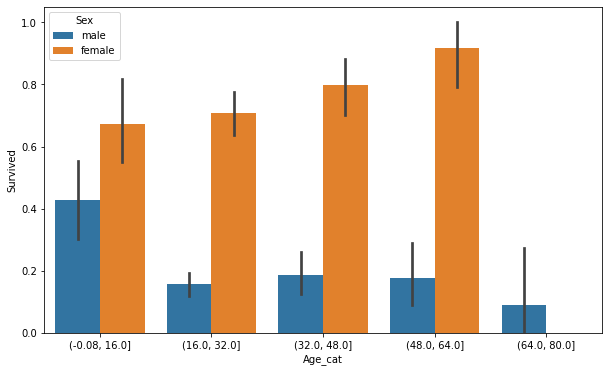

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_train)

Cabin 전처리

In [ ]:
titanic_train['Cabin'].value_counts()

N              687
G6               4
C23 C25 C27      4
B96 B98          4
C22 C26          3
              ... 
C82              1
A24              1
A32              1
F G63            1
C46              1
Name: Cabin, Length: 148, dtype: int64

In [ ]:
for titanic_set in combine:
  titanic_set['Cabin'] = titanic_set['Cabin'].str[:1]

In [ ]:
print(titanic_train['Cabin'].value_counts())

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


sibsp 별 생존여부
parch 별 생존여부

In [ ]:
titanic_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
titanic_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
titanic_train['Family_size'] = titanic_train['SibSp']+titanic_train['Parch']+1
titanic_test['Family_size'] = titanic_test['SibSp']+titanic_test['Parch']+1

In [ ]:
titanic_train.groupby(['Family_size','Survived'])['Survived'].value_counts()

Family_size  Survived  Survived
1            0         0           374
             1         1           163
2            0         0            72
             1         1            89
3            0         0            43
             1         1            59
4            0         0             8
             1         1            21
5            0         0            12
             1         1             3
6            0         0            19
             1         1             3
7            0         0             8
             1         1             4
8            0         0             6
11           0         0             7
Name: Survived, dtype: int64

In [ ]:
titanic_train['Family_size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64

(0.0, 11.0)

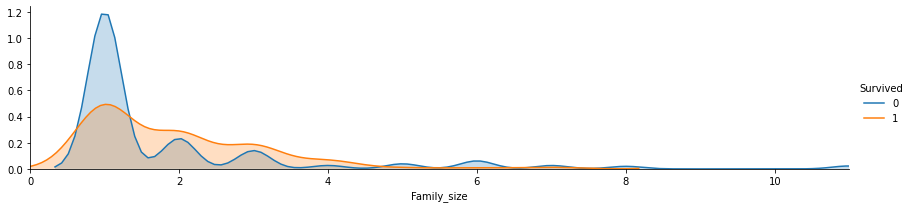

In [ ]:
facet = sns.FacetGrid(titanic_train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Family_size',shade=True)
facet.set(xlim=(0,titanic_train['Family_size'].max()))
facet.add_legend()
plt.xlim(0)

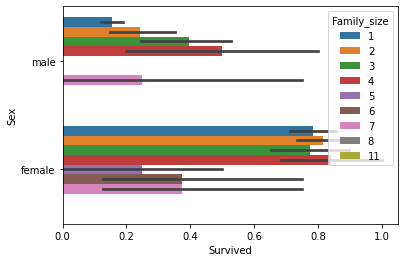

In [ ]:
sns.barplot(x='Survived',y='Sex',hue='Family_size',data=titanic_train)
plt.show()

In [ ]:
titanic_train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Fare (요금) 별 생존여부

In [ ]:
titanic_train['Fare'].value_counts().sort_index(ascending=False)

512.3292     3
263.0000     4
262.3750     2
247.5208     2
227.5250     4
            ..
6.4375       1
6.2375       1
5.0000       1
4.0125       1
0.0000      15
Name: Fare, Length: 248, dtype: int64

In [ ]:
print(titanic_train['Fare'].astype(int))

0       7
1      71
2       7
3      53
4       8
       ..
886    13
887    30
888    23
889    30
890     7
Name: Fare, Length: 891, dtype: int64


In [ ]:
titanic_train['Fare'].mean()

32.2042079685746

In [ ]:
titanic_train['Fare_cat'] = pd.qcut(titanic_train['Fare'],4,labels =[1,2,3,4])
titanic_test['Fare_cat'] = pd.qcut(titanic_test['Fare'],4,labels =[1,2,3,4])
titanic_train = titanic_train.drop(['PassengerId','Fare','Name','Ticket','Age','SibSp','Parch'],axis=1)
titanic_test = titanic_test.drop(['PassengerId','Fare','Name','Ticket','Age','SibSp','Parch'],axis=1)

print(titanic_train.shape)

(891, 9)


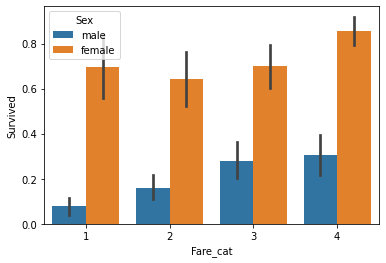

In [ ]:
sns.barplot(x='Fare_cat',y='Survived',hue='Sex',data=titanic_train)
plt.show()

In [ ]:
titanic_train['Fare_cat'].value_counts()

2    224
1    223
4    222
3    222
Name: Fare_cat, dtype: int64

모델 생성

In [ ]:
from sklearn import preprocessing

#label Encoding
def encode_features(df):
    features = ['Cabin','Sex','Embarked','Title_num','Age_cat','Fare_cat','Family_size']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

titanic_df = encode_features(titanic_train)
titanic_df
titanic_test = encode_features(titanic_test)

In [ ]:
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df.head()

,Pclass,Sex,Cabin,Embarked,Title_num,Age_cat,Family_size,Fare_cat
0,3,1,7,2,0,1,1,0
1,1,0,2,0,2,2,1,3
2,3,0,7,2,1,1,0,1
3,1,0,2,2,2,2,1,3
4,3,1,7,2,0,2,0,1


예측모델 생성 및 결과 제출

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,test_size=0.2, random_state=11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=300)
svc_clf = SVC()

dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

svc_clf.fit(X_train , y_train)
svc_pred = svc_clf.predict(X_test)
print('svc_clf 정확도: {0:.4f}'.format(accuracy_score(y_test, svc_pred)))

DecisionTreeClassifier 정확도: 0.8380
RandomForestClassifier 정확도:0.8492
LogisticRegression 정확도: 0.8771
svc_clf 정확도: 0.8547


In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 

exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.7877
교차 검증 1 정확도: 0.8034
교차 검증 2 정확도: 0.8146
교차 검증 3 정확도: 0.8034
교차 검증 4 정확도: 0.8539
평균 정확도: 0.8126


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.8156
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.8258
교차 검증 3 정확도: 0.8090
교차 검증 4 정확도: 0.8483
평균 정확도: 0.8159


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('best_params_ : ',grid_dclf.best_params_)
print('best_score_: ', grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_
pred = best_dclf.predict(X_test)
print('accuracy: ', accuracy_score(y_test , pred))

best_params_ :  {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
best_score_:  0.8061853639318428
accuracy:  0.8770949720670391


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.8771
GBM 수행 시간: 0.1 초 


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

evals = [(X_test, y_test)]

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train , y_train,  early_stopping_rounds=400,eval_set=evals, eval_metric="logloss",  verbose=True)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.643399
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.602906
[2]	validation_0-logloss:0.568271
[3]	validation_0-logloss:0.538974
[4]	validation_0-logloss:0.514
[5]	validation_0-logloss:0.493242
[6]	validation_0-logloss:0.474829
[7]	validation_0-logloss:0.459351
[8]	validation_0-logloss:0.445592
[9]	validation_0-logloss:0.434193
[10]	validation_0-logloss:0.423848
[11]	validation_0-logloss:0.414975
[12]	validation_0-logloss:0.407801
[13]	validation_0-logloss:0.401289
[14]	validation_0-logloss:0.396007
[15]	validation_0-logloss:0.391512
[16]	validation_0-logloss:0.386384
[17]	validation_0-logloss:0.383379
[18]	validation_0-logloss:0.381062
[19]	validation_0-logloss:0.376456
[20]	validation_0-logloss:0.37457
[21]	validation_0-logloss:0.370887
[22]	validation_0-logloss:0.369303
[23]	validation_0-logloss:0.367063
[24]	validation_0-logloss:0.364772
[25]	validation_0-logloss:0.363056
[26]	validation_0-logloss:0.360728


In [ ]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[110   8]
 [ 13  48]]
정확도: 0.8827, 정밀도: 0.8571, 재현율: 0.7869,    F1: 0.8205, AUC:0.9071


In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.643399
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.602906
[2]	validation_0-logloss:0.568271
[3]	validation_0-logloss:0.538974
[4]	validation_0-logloss:0.514
[5]	validation_0-logloss:0.493242
[6]	validation_0-logloss:0.474829
[7]	validation_0-logloss:0.459351
[8]	validation_0-logloss:0.445592
[9]	validation_0-logloss:0.434193
[10]	validation_0-logloss:0.423848
[11]	validation_0-logloss:0.414975
[12]	validation_0-logloss:0.407801
[13]	validation_0-logloss:0.401289
[14]	validation_0-logloss:0.396007
[15]	validation_0-logloss:0.391512
[16]	validation_0-logloss:0.386384
[17]	validation_0-logloss:0.383379
[18]	validation_0-logloss:0.381062
[19]	validation_0-logloss:0.376456
[20]	validation_0-logloss:0.37457
[21]	validation_0-logloss:0.370887
[22]	validation_0-logloss:0.369303
[23]	validation_0-logloss:0.367063
[24]	validation_0-logloss:0.364772
[25]	validation_0-logloss:0.363056
[26]	validation_0-logloss:0.360728
[

In [ ]:
import lightgbm
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.601077	valid_0's binary_logloss: 0.601077
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.566887	valid_0's binary_logloss: 0.566887
[3]	valid_0's binary_logloss: 0.538183	valid_0's binary_logloss: 0.538183
[4]	valid_0's binary_logloss: 0.511515	valid_0's binary_logloss: 0.511515
[5]	valid_0's binary_logloss: 0.489168	valid_0's binary_logloss: 0.489168
[6]	valid_0's binary_logloss: 0.470152	valid_0's binary_logloss: 0.470152
[7]	valid_0's binary_logloss: 0.453582	valid_0's binary_logloss: 0.453582
[8]	valid_0's binary_logloss: 0.440052	valid_0's binary_logloss: 0.440052
[9]	valid_0's binary_logloss: 0.427732	valid_0's binary_logloss: 0.427732
[10]	valid_0's binary_logloss: 0.41726	valid_0's binary_logloss: 0.41726
[11]	valid_0's binary_logloss: 0.407982	valid_0's binary_logloss: 0.407982
[12]	valid_0's binary_logloss: 0.400206	valid_0's binary_logloss: 0.400206
[13]	valid_0's binary_logloss: 0.393244	valid_0'

In [ ]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba) # XGBClassifier

오차 행렬
[[110   8]
 [ 13  48]]
정확도: 0.8827, 정밀도: 0.8571, 재현율: 0.7869,    F1: 0.8205, AUC:0.9071


In [ ]:
get_clf_eval(y_test, preds, pred_proba) # LightGBM

오차 행렬
[[110   8]
 [ 13  48]]
정확도: 0.8827, 정밀도: 0.8571, 재현율: 0.7869,    F1: 0.8205, AUC:0.9046


In [ ]:
svc_clf.fit(X_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
titanic_train

,Survived,Pclass,Sex,Cabin,Embarked,Title_num,Age_cat,Family_size,Fare_cat
0,0,3,1,7,2,0,1,1,0
1,1,1,0,2,0,2,2,1,3
2,1,3,0,7,2,1,1,0,1
3,1,1,0,2,2,2,2,1,3
4,0,3,1,7,2,0,2,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,7,2,3,1,0,1
887,1,1,0,1,2,1,1,0,2
888,0,3,0,7,2,1,1,3,2
889,1,1,1,2,0,0,1,0,2


In [ ]:
titanic_test

,Pclass,Sex,Cabin,Embarked,Title_num,Age_cat,Family_size,Fare_cat
0,3,1,7,1,0,1,0,0
1,3,0,7,2,2,2,1,0
2,2,1,7,1,0,1,0,1
3,3,1,7,2,0,2,0,1
4,3,0,7,2,2,2,2,1
...,...,...,...,...,...,...,...,...
413,3,1,7,2,0,1,0,1
414,1,0,2,0,3,2,0,3
415,3,1,7,2,0,2,0,0
416,3,1,7,2,0,2,0,1


In [ ]:
prediction = svc_clf.predict(titanic_test)

In [ ]:
test_Passenger = pd.read_csv('test.csv')
submission = pd.DataFrame({"PassengerId":test_Passenger["PassengerId"], "Survived" : prediction})
submission.to_csv('submission(svc).csv', index=False)

In [ ]:
submission = pd.read_csv('gender_submission.csv')
print(submission)
print(submission.shape)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
(418, 2)
